Tim Nguyen 9/19/2023 IT-309 Assignment 2

In [154]:
import time
import pandas as pd
import math
import matplotlib.pyplot as plt

In [152]:
#Linear
execution_time = 1.783
N = 500000
print(N)
linear_time_complexity = execution_time / N
print("T(n)/N (Linear Time Complexity):", linear_time_complexity)

#Quad
quadratic_time_complexity = execution_time / (N ** 2)
print("T(n)/N^2 (Quadratic Time Complexity):", quadratic_time_complexity)

#Log
import math

log_linear_time_complexity = execution_time / (N * math.log2(N))
print("T(n)/(n * log(n)) (Log-Linear Time Complexity):", log_linear_time_complexity)


500000
T(n)/N (Linear Time Complexity): 3.566e-06
T(n)/N^2 (Quadratic Time Complexity): 7.132e-12
T(n)/(n * log(n)) (Log-Linear Time Complexity): 1.8836262758375864e-07


In [167]:
#Insertion Sort
import time

def read_input_file(file_path):
    with open(file_path, 'r') as file:
        data = [int(line) for line in file.readlines()]
    return data

def func_insertion_sort(A):
    swaps = 0
    numCompares = 0
    k = 1
    while k < len(A):
        j = k 
        while j > 0 and A[j] < A[j - 1]:
            numCompares += 1
            A[j], A[j - 1] = A[j - 1], A[j]
            swaps += 1
            j -= 1
            if j > 0:
                j - 1, 
        k += 1
    return A, swaps, numCompares

file_paths = ['100.txt','1000.txt', '10000.txt', '50000.txt', '200000.txt', '500000.txt']

for file_path in file_paths:
    start_time = time.time()
    A = read_input_file(file_path)
    sorted_data, nSwaps, nCompares = func_insertion_sort(A)
    end_time = time.time()

    print(f"File: {file_path}")
    print('Number of swaps: ', nSwaps)
    print('Number of compares: ', nCompares)
    print(f"Insertion Sort Time for {file_path}: {end_time - start_time} seconds")

plot_insertion_sort(file_paths)

File: 100.txt
Number of swaps:  2144
Number of compares:  2144
Insertion Sort Time for 100.txt: 0.0015015602111816406 seconds
File: 1000.txt
Number of swaps:  254998
Number of compares:  254998
Insertion Sort Time for 1000.txt: 0.09958553314208984 seconds


KeyboardInterrupt: 

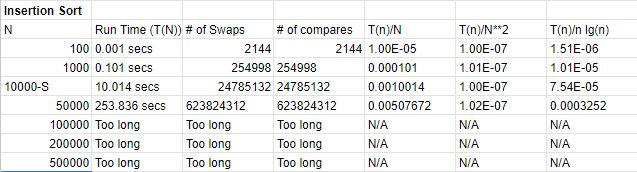

Insertion Sort utilizes the time complexity O(n). It sorts an array of 'a' of 'n' numbers as seen above. Start at 1 and shift left if the number is less than the number on the left. Here we see properties of an invariant where values greater than i are unsorted, and values less than i are sorted, but not in final position. This is good for small sets of data where in-place sorting is more favorable. However, as seen in the results - once we get to the 100000s, it becomes very time consuming to run insertion sort. As shown in the chart, it became 10 seconds for 10,000 elements to 253 seconds for only 5x the amount of elements! Its efficency totally got butchered past a certain threshold (10,000). It got to a point where it would take over 30+ mins to run one text file containing 100000 elements which was way too inconvenient. 

In [ ]:
#Bubble Sort
def read_input_file(file_path):
    with open(file_path, 'r') as file:
        data = [int(line) for line in file.readlines()]
    return data

def func_bubble_sort(A):
    if len(A) == 0:
        print("Error: the input list is empty!")
        return A, 0
    totalSwaps = 0
    totalCompares = 0
    i = j = 0
    while i < len(A):
        while j < len(A) - 1:
            totalCompares += 1
            if A[j] > A[j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]
                totalSwaps += 1
            j += 1
        j = 0
        i += 1
    return A, totalCompares, totalSwaps

# List of file paths to read
file_paths = ['100.txt','1000.txt', '10000.txt','50000.txt','200000.txt','500000.txt']  

for file_path in file_paths:
    start_time = time.time()
    A = read_input_file(file_path)
    sorted_data, nCompares, nSwaps = func_bubble_sort(A)
    end_time = time.time()
    print(f"File: {file_path}")
    print('Number of compares: ', nCompares)
    print('Number of swaps: ', nSwaps)
    print(f"Bubble Sort Time for {file_path}: {end_time - start_time} seconds")

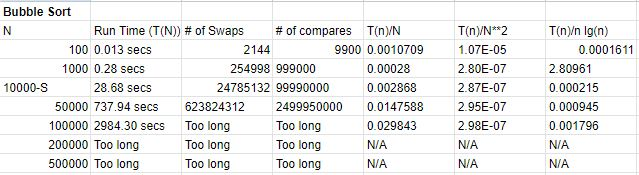

Bubble sort is similar to Insertion sort where they are both in-place sorting algorithms and utilizes the time complexity of O(n). It iterates itself through the list with the biggest number (or next biggest) being selected and "bubbled" to the top on each loop. Using bubble sort on smaller amounts of data proved to be vastly quicker than using bubble sort on anything past 50,000. And since it's an in-place algorithm, it only will use memory that is given by the array. Again, it got to a point where it was taking too long for the run  time to finish on the bigger sets, like the gap of runtime between 10,000 and 50,000 elements - similar to insertion sort. Hence, I will only recommend using bubble sort on small amounts of data.

In [134]:
# Merge Sort 
def read_input_file(file_path):
    with open(file_path, 'r') as file:
        data = [int(line) for line in file.readlines()]
    return data

merge_count = 0

def merge(S1, S2, S):
    global merge_count
    i = j = 0
    while i + j < len(S):
        if j == len(S2) or (i < len(S1) and S1[i] < S2[j]):
            S[i + j] = S1[i]
            i += 1
        else:
            S[i + j] = S2[j]
            j += 1
            merge_count += 1 

def merge_sort(S):
    global merge_count
    n = len(S)
    if n < 2:
        return
    mid = n // 2
    S1 = S[0:mid]
    S2 = S[mid:n]
    merge_sort(S1)
    merge_sort(S2)
    merge(S1, S2, S)

file_paths = ['100.txt', '1000.txt', '10000.txt', '100000.txt', '50000.txt', '200000.txt', '500000.txt']

for file_path in file_paths:
    start_time = time.time()
    A = read_input_file(file_path)
    merge_count = 0
    sorted_data = merge_sort(A)
    end_time = time.time()

    print(f"File: {file_path}")
    print(f"Merge Sort Time for {file_path}: {end_time - start_time} seconds")
    print(f"Number of Merges: {file_path}: {merge_count}")


File: 100.txt
Merge Sort Time for 100.txt: 0.001500844955444336 seconds
Number of Merges: 100.txt: 356
File: 1000.txt
Merge Sort Time for 1000.txt: 0.0020012855529785156 seconds
Number of Merges: 1000.txt: 5044
File: 10000.txt
Merge Sort Time for 10000.txt: 0.028525114059448242 seconds
Number of Merges: 10000.txt: 69008
File: 100000.txt
Merge Sort Time for 100000.txt: 0.348799467086792 seconds
Number of Merges: 100000.txt: 853904
File: 50000.txt
Merge Sort Time for 50000.txt: 0.1621396541595459 seconds
Number of Merges: 50000.txt: 401952
File: 200000.txt
Merge Sort Time for 200000.txt: 0.7491443157196045 seconds
Number of Merges: 200000.txt: 1807808
File: 500000.txt
Merge Sort Time for 500000.txt: 2.0247418880462646 seconds
Number of Merges: 500000.txt: 4783216


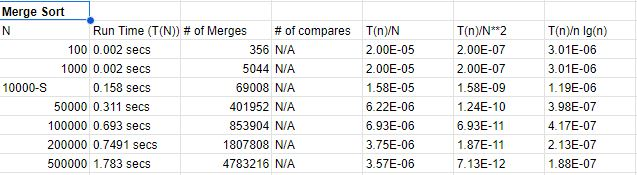

Merge sort having the time complexity of O(n lg n) is good at handling large amounts of data which is shown here. Like in previous data sets, I was not able to run past 50,000 or 100,000 amounts of elements in the text file. Its algorithm shows its true efficiency when it reaches around 100,000 as shown in the run times. The divide and conquer method works very well when splitting inputs and recursively splits back semi-sorted halves. Especially seen at the 10,000 to 50,000 element bottleneck that the insertion and bubble sort faced. Here it handles large amounts of data at very efficient speeds. Hence, merge sort would be good to consider when working with big sets of data.